<a href="https://colab.research.google.com/github/mylenagsd/PDS/blob/main/TP03_pds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import soundfile as sf
from IPython.display import Audio

sig, sr = sf.read('LDC2006S16.wav')

In [2]:
# A-Law

def lei_A(sig):
  A = 87.56
  f = np.zeros(sig.shape)

  for x in range(len(sig)):
    if 0 <= abs(sig[x]) < 1/A:
      f[x] = A*abs(sig[x])*sig[x]/(1+ np.log(A)) 
    if 1/A <= abs(sig[x]) <= 1:
      f[x] = (1 + np.log(A*abs(sig[x])))*sig[x]/(1+ np.log(A)) 
  
  return f

In [3]:
# mi-Law

def lei_mi(sig):
  mi = 255
  f = np.zeros(sig.shape)

  for x in range(len(sig)):
      f[x] = np.log(1 + mi*abs(sig[x]))*sig[x]/np.log(1 + mi) 
  
  return f

Text(0.5, 1.0, 'Compressao mi')

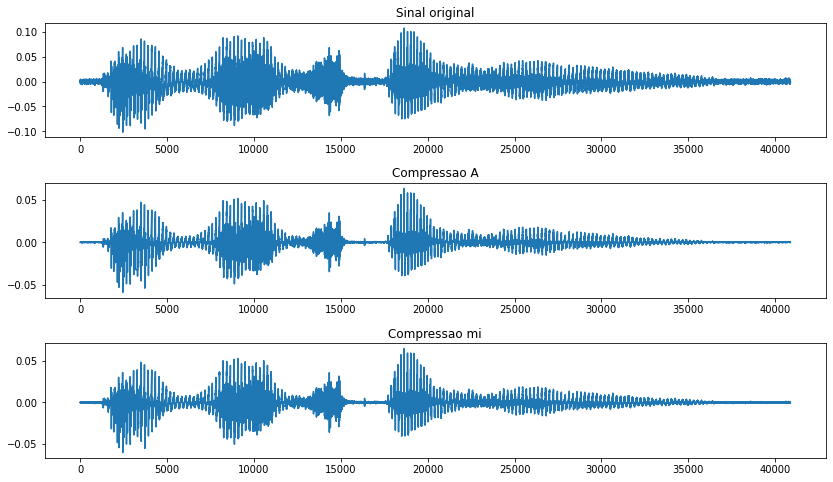

In [4]:
# Q1

sig_cmp_A = lei_A(sig)
sig_cmp_mi = lei_mi(sig)

plt.figure(figsize = (14, 8))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(311)
plt.plot(sig)
plt.title('Sinal original')
plt.subplot(312)
plt.plot(sig_cmp_A)
plt.title('Compressao A')
plt.subplot(313)
plt.plot(sig_cmp_mi)
plt.title('Compressao mi')

In [5]:
Audio(sig, rate=sr) # original signal

In [6]:
Audio(sig_cmp_A, rate=sr) # A-Law compression

In [7]:
Audio(sig_cmp_mi, rate=sr) # mi-Law compression

In [8]:
# Q2

def quant(sig, B):
  L = 2**B # quantization levels
  S = (max(sig)-min(sig))/L # quantization steps

  sig_q = np.floor(sig/S)*S+S/2 # mid-riser
  sig_e = sig - sig_q # error

  return sig_q, sig_e

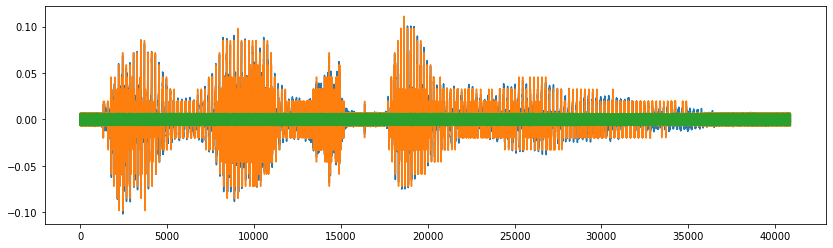

In [9]:
sig_q, sig_e = quant(sig, 4) # 4 bits

plt.figure(figsize = (14, 4))
plt.plot(sig) # original signal
plt.plot(sig_q) # quantized signal
plt.plot(sig_e) # error

Audio(sig_q, rate=sr)

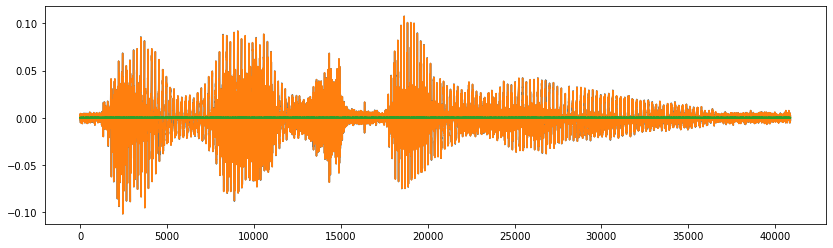

In [10]:
sig_q, sig_e = quant(sig, 8) # 8 bits

plt.figure(figsize = (14, 4))
plt.plot(sig) # original signal
plt.plot(sig_q) # quantized signal
plt.plot(sig_e) # error

Audio(sig_q, rate=sr)

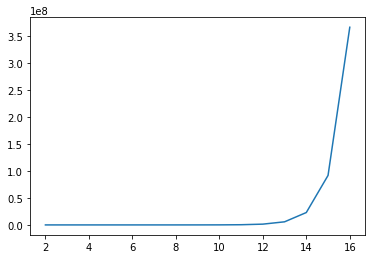

In [11]:
# Q3a

T = len(sig)/sr
dx = 1/sr
B = np.linspace(2,16,15) 

SQNR = np.zeros(B.shape)

for x, n in enumerate(B):
  sig_q, sig_e = quant(sig, n)
  Ps = np.sum(sig**2)*dx/T # signal power
  Pe = np.sum(sig_e**2)*dx/T # error power
  SQNR[x] = Ps/Pe

plt.plot(B, SQNR)

In [12]:
# reversa A-Law

def lei_A_inv(sig):
  A = 87.56
  f = np.zeros(sig.shape)

  for x in range(len(sig)):
    if 0 <= abs(sig[x]) < 1/(1+np.log(A)):
      f[x] = ((1+np.log(A))*abs(sig[x])*sig[x])/A 
    if 1/(1+np.log(A)) <= abs(sig[x]) < 1:
      f[x] = (np.exp((1+np.log(A))*abs(sig[x])-1)*sig[x])/A 
  
  return f

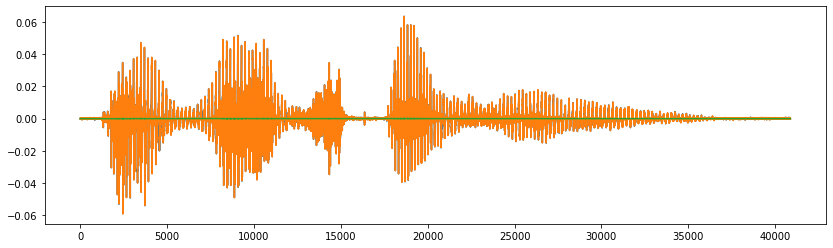

In [13]:
# Q3b1

sig_qA, sig_qAe = quant(sig_cmp_A, 8)
sig_q_invA = lei_A_inv(sig_qA)

plt.figure(figsize = (14, 4))
plt.plot(sig_cmp_A) # A-Law compression
plt.plot(sig_qA) # A-Law compression, quantized signal
plt.plot(sig_q_invA) # A-Law decompression, quantized signal
Audio(sig_q_invA, rate=sr)

In [14]:
# reversa mi-Law

def lei_mi_inv(sig):
  mi = 255
  f = np.zeros(sig.shape)

  for x in range(len(sig)):
      f[x] = (((1 + mi)**abs(sig[x]))-1)*sig[x]/mi
  
  return f

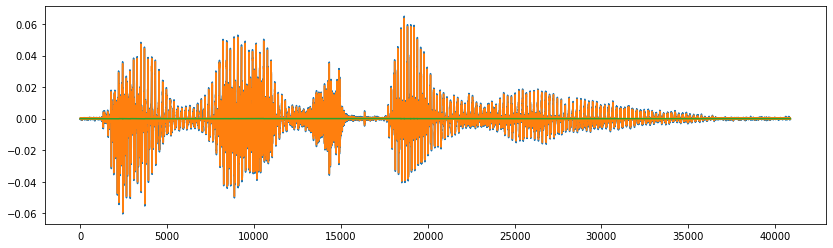

In [15]:
# Q3b2

sig_qmi, sig_qmie = quant(sig_cmp_A, 8)
sig_q_invmi = lei_mi_inv(sig_qmi)

plt.figure(figsize = (14, 4))
plt.plot(sig_cmp_mi) # mi-Law compression
plt.plot(sig_qmi) # mi-Law compression, quantized signal
plt.plot(sig_q_invmi) # mi-Law decompression, quantized signal
Audio(sig_q_invmi, rate=sr)